<a href="https://colab.research.google.com/github/cpappas18/articulaite/blob/main/new_audio_features_visualization_AI4Good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Code that retrieves user input in the form of audio and extracts feautures that can be used to check for Parkinsons, ALS and other similar conditions***

In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install PyAudio
!pip install ffmpeg-python

Getting the voice recording from the user 

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording, press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording..."
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""
#function that records the audio
def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

Record your voice 

In [ ]:
#user is able to record their voice and recieve the audio 
audio, sr = get_audio()

In [ ]:
print(audio)

[ 0  0  0 ... -1  4 10]


Note: If we want to get the vector repr of the audio from a .wav file use this following line of code instead of the get_audio() function

In [ ]:
 import librosa 
 audio, sr = librosa.load('CM13_B1_CW4_M6.wav', sr= None)

VISUALIZATION OF SPEECH FEATURES

Speech Amplitudes of 4 classes Healthy Control, ALS Patients, Cerebral Palsy Patients, and Parkinson's Disease Patients

In [ ]:
!pip uninstall parselmouth
!pip install praat-parselmouth

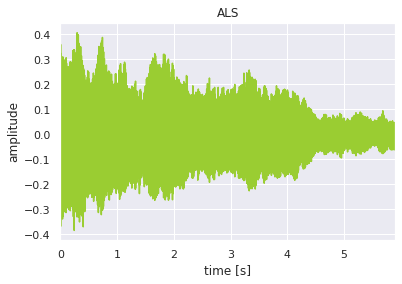

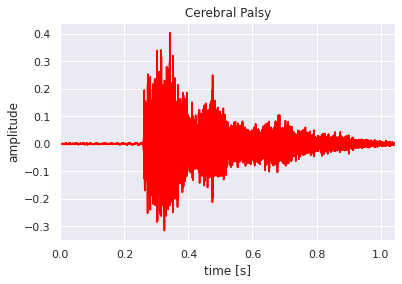

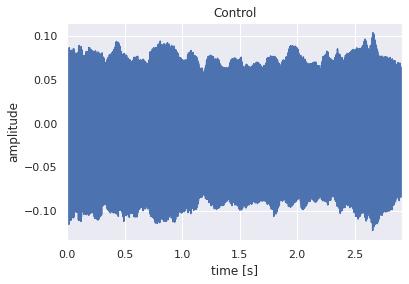

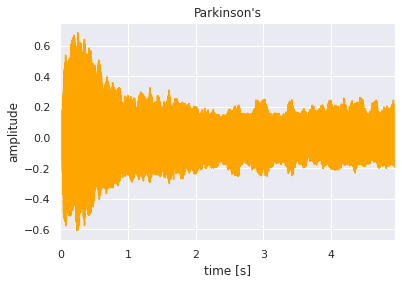

In [ ]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ALS
sns.set() # Using seaborn's default style 
# Plot nice figures using Python's "standard" matplotlib library
snd_als = parselmouth.Sound("SPA2019_Pathology_008.wav")
plt.figure()
plt.plot(snd_als.xs(), snd_als.values.T,color='yellowgreen')
plt.xlim([snd_als.xmin, snd_als.xmax])
plt.title("ALS")
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

#Cerebral Palsy
sns.set() # Using seaborn's default style 
# Plot nice figures using Python's "standard" matplotlib library
snd_cp = parselmouth.Sound("CP (online-audio-converter.com).wav")
plt.figure()
plt.plot(snd_cp.xs(), snd_cp.values.T,color='red')
plt.xlim([snd_als.xmin, snd_cp.xmax])
plt.title("Cerebral Palsy")
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

#Healthy Control
sns.set() # Using seaborn's default style 
# Plot nice figures using Python's "standard" matplotlib library
sns.set() # Using seaborn's default style 
snd_HC = parselmouth.Sound("SPA2019_Control_002.wav")
plt.figure()
plt.plot(snd_HC.xs(), snd_HC.values.T)
plt.xlim([snd_HC.xmin, snd_HC.xmax])
plt.title("Control")
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

#Parkinsons
sns.set() # Using seaborn's default style 
# Plot nice figures using Python's "standard" matplotlib library
snd_pd = parselmouth.Sound("Giddo-a-1.wav")
plt.figure()
plt.plot(snd_pd.xs(), snd_pd.values.T,color='orange')
plt.xlim([snd_pd.xmin, snd_pd.xmax])
plt.title("Parkinson's")
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")
#Healthy Control
sns.set() # Using seaborn's default style 

Spectograms of the 4 classes


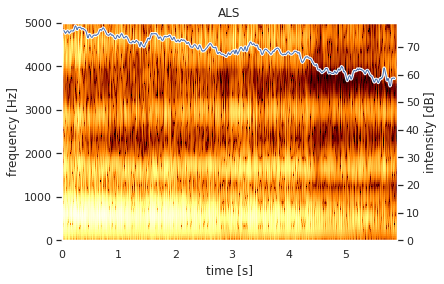

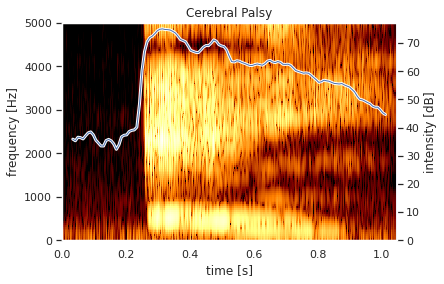

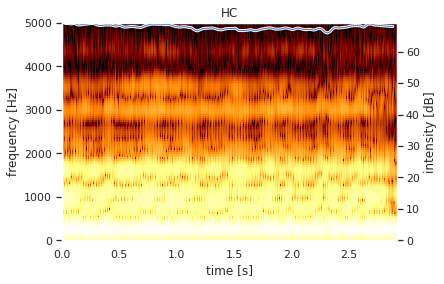

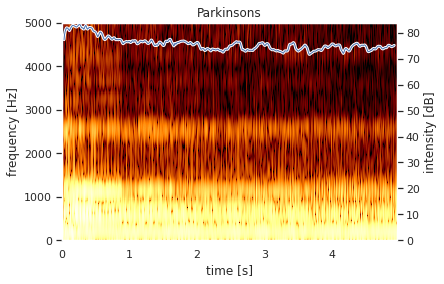

In [ ]:
#ALS
def draw_spectrogram_als(spectrogram_als, dynamic_range=70):
    X, Y = spectrogram_als.x_grid(), spectrogram_als.y_grid()
    sg_db = 10 * np.log10(spectrogram_als.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram_als.ymin, spectrogram_als.ymax])
    plt.title("ALS")
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity_als(intensity_als):
    plt.plot(intensity_als.xs(), intensity_als.values.T, linewidth=3, color='w')
    plt.plot(intensity_als.xs(), intensity_als.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")
    
#Cerebral Palsy
def draw_spectrogram_cp(spectrogram_cp, dynamic_range=70):
    X1, Y1 = spectrogram_cp.x_grid(), spectrogram_cp.y_grid()
    sg_db = 10 * np.log10(spectrogram_cp.values)
    plt.pcolormesh(X1, Y1, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram_cp.ymin, spectrogram_cp.ymax])
    plt.title("Cerebral Palsy")
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity_cp(intensity_cp):
    plt.plot(intensity_cp.xs(), intensity_cp.values.T, linewidth=3, color='w')
    plt.plot(intensity_cp.xs(), intensity_cp.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")
    
#HC
def draw_spectrogram_HC(spectrogram_HC, dynamic_range=70):
    X2, Y2 = spectrogram_HC.x_grid(), spectrogram_HC.y_grid()
    sg_db = 10 * np.log10(spectrogram_HC.values)
    plt.pcolormesh(X2, Y2, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram_HC.ymin, spectrogram_HC.ymax])
    plt.title("HC")
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity_hc(intensity_HC):
    plt.plot(intensity_HC.xs(), intensity_HC.values.T, linewidth=3, color='w')
    plt.plot(intensity_HC.xs(), intensity_HC.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

#Parkinsons
def draw_spectrogram_pd(spectrogram_pd, dynamic_range=70):
    X3, Y3 = spectrogram_pd.x_grid(), spectrogram_pd.y_grid()
    sg_db = 10 * np.log10(spectrogram_pd.values)
    plt.pcolormesh(X3, Y3, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram_pd.ymin, spectrogram_pd.ymax])
    plt.title("Parkinsons")
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity_pd(intensity_pd):
    plt.plot(intensity_pd.xs(), intensity_pd.values.T, linewidth=3, color='w')
    plt.plot(intensity_pd.xs(), intensity_pd.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

    
#ALS
intensity_als = snd_als.to_intensity()
spectrogram_als = snd_als.to_spectrogram()
plt.figure()
draw_spectrogram_als(spectrogram_als)
plt.twinx()
draw_intensity_als(intensity_als)
plt.xlim([snd_als.xmin, snd_als.xmax])
plt.show() 

#CP
intensity_cp= snd_cp.to_intensity()
spectrogram_cp = snd_cp.to_spectrogram()
plt.figure()
draw_spectrogram_cp(spectrogram_cp)
plt.twinx()
draw_intensity_cp(intensity_cp)
plt.xlim([snd_cp.xmin, snd_cp.xmax])
plt.show()

#HC
intensity_HC = snd_HC.to_intensity()
spectrogram_HC = snd_HC.to_spectrogram()
plt.figure()
draw_spectrogram_HC(spectrogram_HC)
plt.twinx()
draw_intensity_hc(intensity_HC)
plt.xlim([snd_HC.xmin, snd_HC.xmax])
plt.show() 

#Parkinsons
intensity_pd = snd_pd.to_intensity()
spectrogram_pd = snd_pd.to_spectrogram()
plt.figure()
draw_spectrogram_pd(spectrogram_pd)
plt.twinx()
draw_intensity_pd(intensity_pd)
plt.xlim([snd_pd.xmin, snd_pd.xmax])
plt.show()

There are drastic differences when aligning frequency and intensity over time. CP demonstrate the most dynamic changes in all three as it spikes momentarily and then immediately drops. HC demonstrate a consistent frequency and intensity over time. ALS patients cannot maintain the same frequency or intensity over the sustained vowel /a/ and as such you can see the drop. PD patients exhibit the same tendency as ALS however, the drop can be seen happening almost immediately.

Fundamental Frequency in the 4 classes 

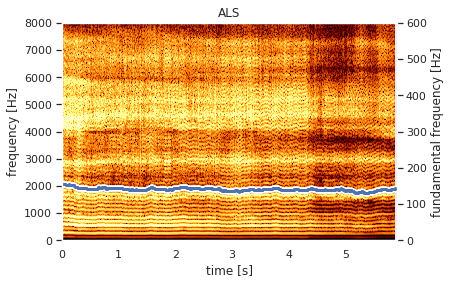

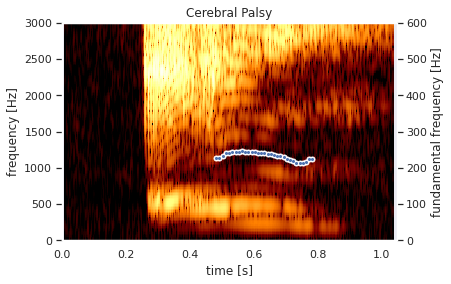

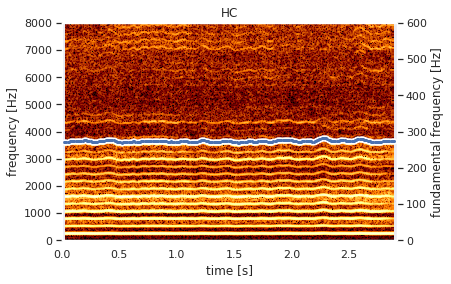

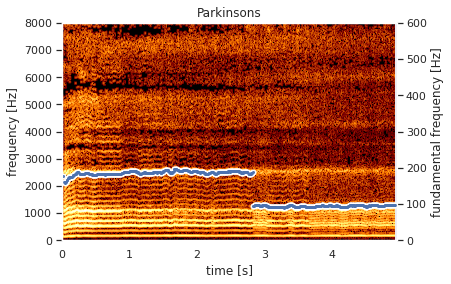

In [ ]:
#ALS
def draw_pitch_als(pitch_als):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch_als.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch_als.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch_als.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch_als.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

pitch_als = snd_als.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd_als.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram_als = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram_als(spectrogram_als)
plt.twinx()
draw_pitch_als(pitch_als)
plt.xlim([snd_als.xmin, snd_als.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")

#CP
def draw_pitch_cp(pitch_cp):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch_cp.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch_cp.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch_cp.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch_cp.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

pitch_cp = snd_cp.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd_cp = snd_cp.copy()
pre_emphasized_snd_cp.pre_emphasize()
spectrogram_cp = pre_emphasized_snd_cp.to_spectrogram(window_length=0.01, maximum_frequency=3000)
plt.figure()
draw_spectrogram_cp(spectrogram_cp)
plt.twinx()
draw_pitch_cp(pitch_cp)
plt.xlim([snd_cp.xmin, snd_cp.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")

#HC
def draw_pitch_hc(pitch_HC):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch_HC.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch_HC.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch_HC.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch_HC.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

pitch_HC = snd_HC.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd_hc = snd_HC.copy()
pre_emphasized_snd_hc.pre_emphasize()
spectrogram = pre_emphasized_snd_hc.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram_HC(spectrogram)
plt.twinx()
draw_pitch_hc(pitch_HC)
plt.xlim([snd_HC.xmin, snd_HC.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")

#PD
def draw_pitch_pd(pitch_pd):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch_pd.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch_pd.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch_pd.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch_pd.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

pitch_pd = snd_pd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd_pd = snd_pd.copy()
pre_emphasized_snd_pd.pre_emphasize()
spectrogram_pd = pre_emphasized_snd_pd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram_pd(spectrogram_pd)
plt.twinx()
draw_pitch_pd(pitch_pd)
plt.xlim([snd_pd.xmin, snd_pd.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")

As can be seen the fundamental frequency of the different illnesses present differently. The FF of a patient with ALS is more or so consistent over time. The cerebral palsy patients shows a rather dynamic and higher FF. Healthy patient have FFs that are consistent and flat over the sustained /a/ phonotation and represent the highest FF of all 4 individuals. A sudden drop in FF and frequency can be seen with the PD patient as a sustained FF is likely unattainable with this disease. Therefore, through these differences as well as others in the different features, we can differentiate between all 4 classes.